<a href="https://colab.research.google.com/github/OJB-Quantum/Notebooks-for-Ideas/blob/main/2_Qubit_State_Visualization_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries installed successfully.
=== Analyzing Initial State: |00> (Product State) ===

--- 1. Bloch Sphere Multivector: Initial State: |00> ---
This shows the state of each qubit on its own Bloch sphere.
For entangled states, the vectors are inside the sphere, indicating a mixed state for each qubit.


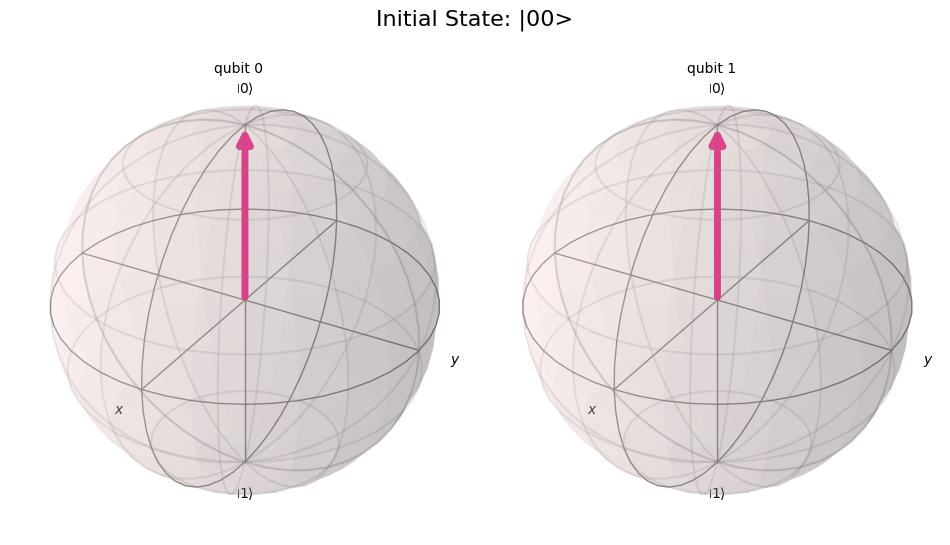


--- 2. Q-sphere: Initial State: |00> ---
The Q-sphere maps state amplitudes and phases to a sphere.
The size of a point represents the magnitude of the amplitude for a basis state,
and the color represents its phase.


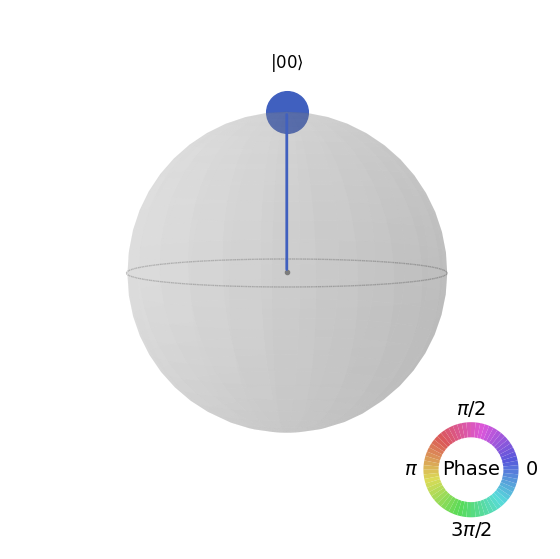


--- 3. Quantum Steering Ellipsoid: Steering Ellipsoid for |00> ---
This shows the states Qubit B can be 'steered' to by measuring Qubit A.
If it's a single point, there's no steering. If it's a non-trivial ellipsoid, the state is entangled.


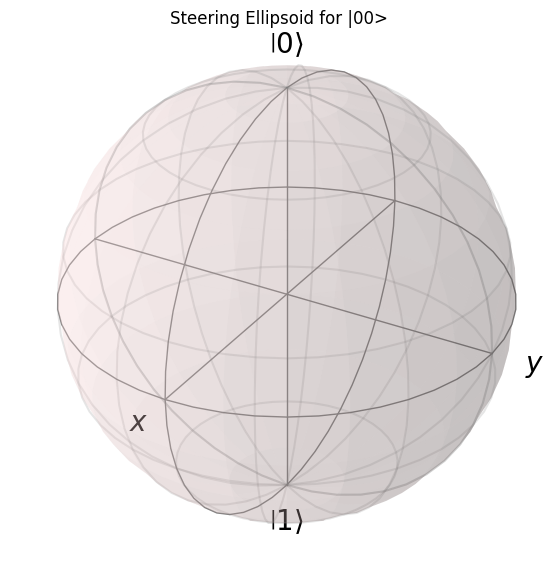


--- 4. Schmidt Decomposition: Schmidt Decomposition for |00> ---
Any pure 2-qubit state can be written as |psi> = l0*|u0>|v0> + l1*|u1>|v1>.
The Schmidt coefficients (l0, l1) quantify entanglement.
Schmidt Coefficients: lambda_0 = 1.0000, lambda_1 = 0.0000
Entanglement (Concurrence): 0.0000


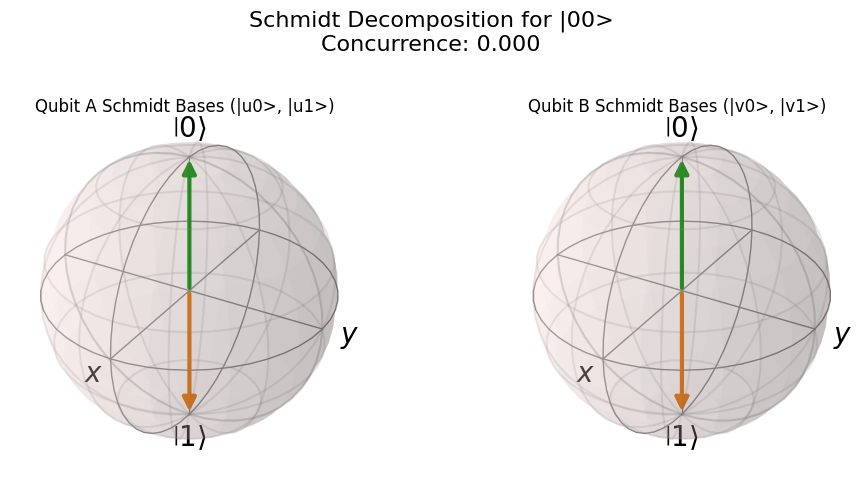


--- 5. Toroidal Geometry (Conceptual Explanation) ---
This is a highly abstract method mapping entanglement invariants to a torus surface.
It's powerful for classifying entanglement but too complex for standard library plotting.

--- 6. Correlation Invariants Plot: Initial State: |00> ---
This plot shows the invariants of the state under local unitary operations.
These are the eigenvalues of T_transpose * T, where T is the correlation matrix.
The values reveal the nature and strength of correlations between the qubits.
Local Invariants: [1. 0. 0.]


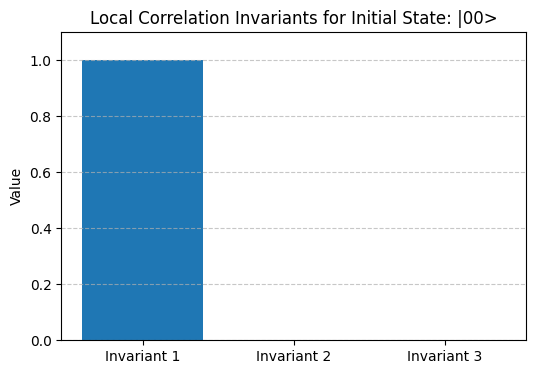


--- 7. Wigner Function: Wigner Functions for |00> ---
A phase-space representation. Negative values (red) are a key sign of non-classicality.


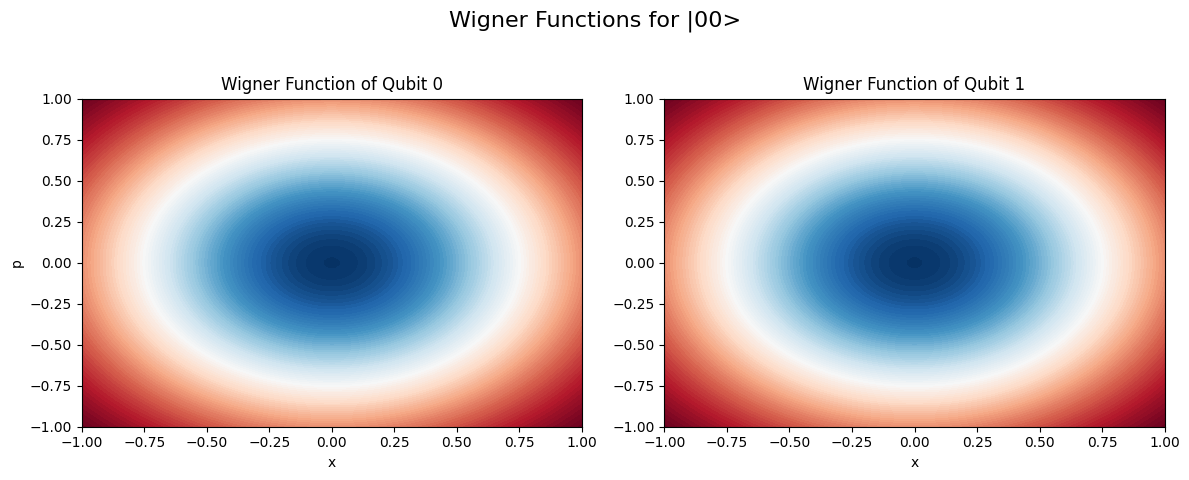


--- 8. Density Matrix: Density Matrix for |00> ---
Shows the real (blue) and imaginary (red) parts of the density matrix.
Off-diagonal elements indicate coherence and entanglement.


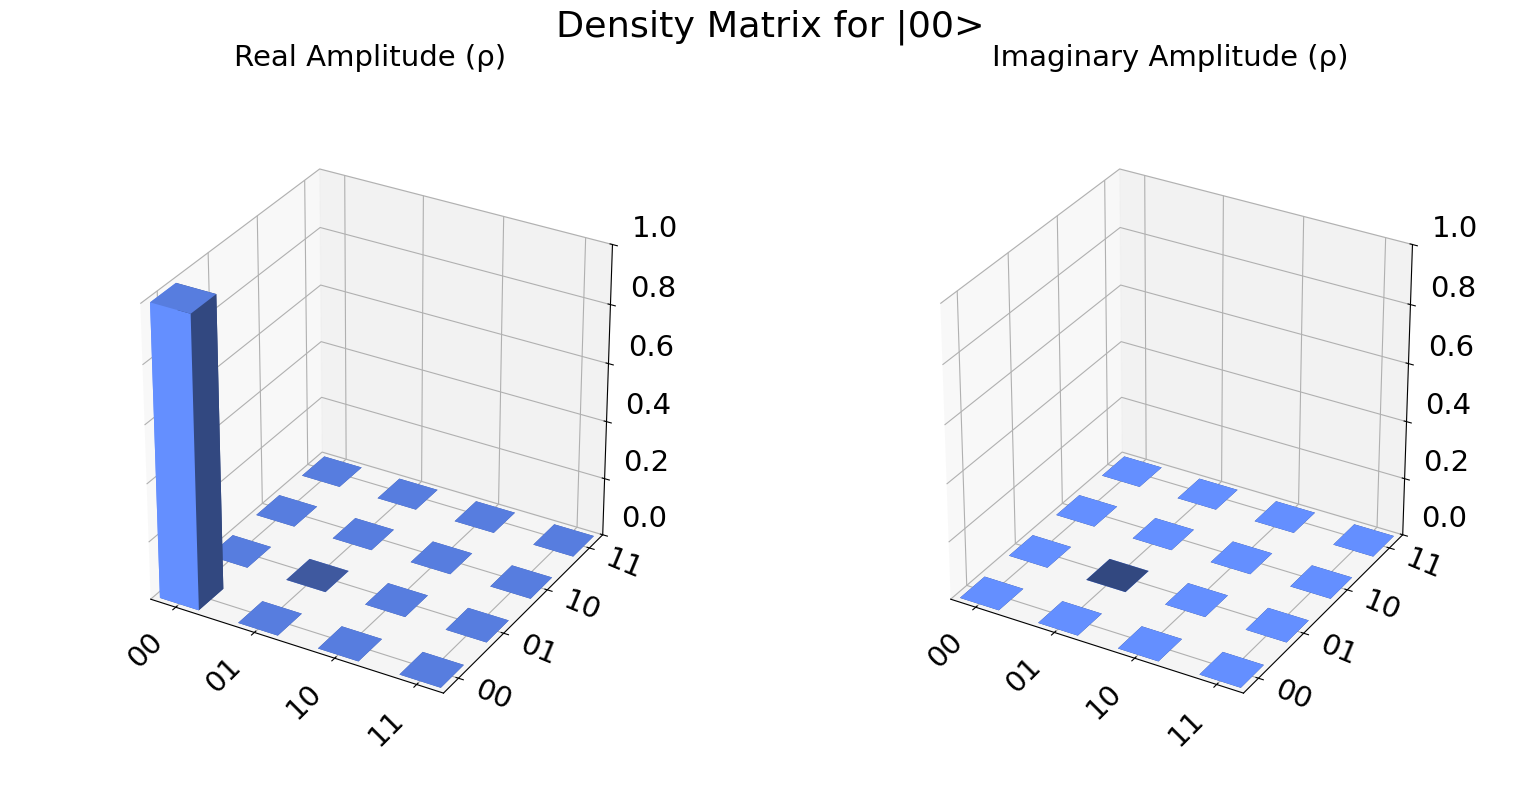



===   Analyzing Final State (Entangled State)    ===

Circuit Diagram:


┌───┐                     
q_0: ┤ H ├──■──────────────────
     └───┘┌─┴─┐┌─────────┐┌───┐
q_1: ─────┤ X ├┤ Ry(π/4) ├┤ Z ├
          └───┘└─────────┘└───┘


--- 1. Bloch Sphere Multivector: Final Entangled State ---
This shows the state of each qubit on its own Bloch sphere.
For entangled states, the vectors are inside the sphere, indicating a mixed state for each qubit.


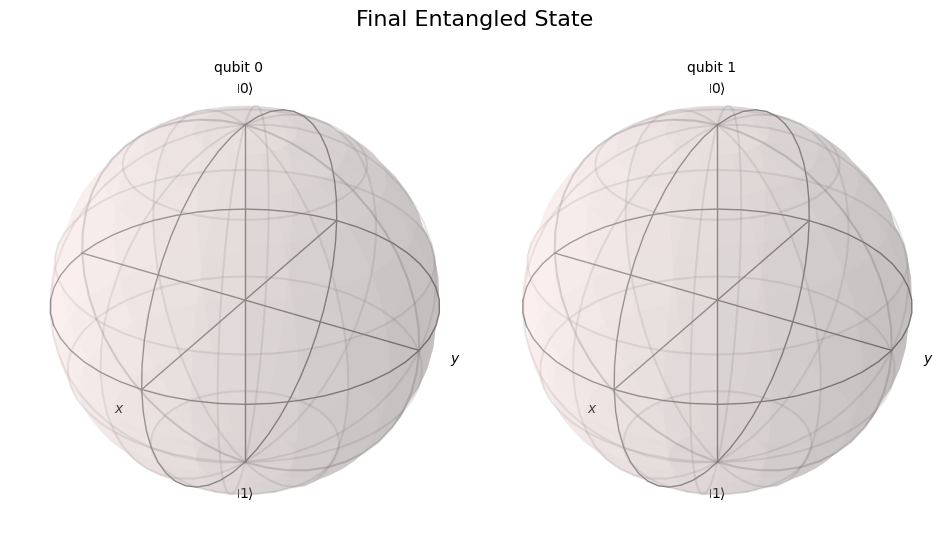


--- 2. Q-sphere: Final Entangled State ---
The Q-sphere maps state amplitudes and phases to a sphere.
The size of a point represents the magnitude of the amplitude for a basis state,
and the color represents its phase.


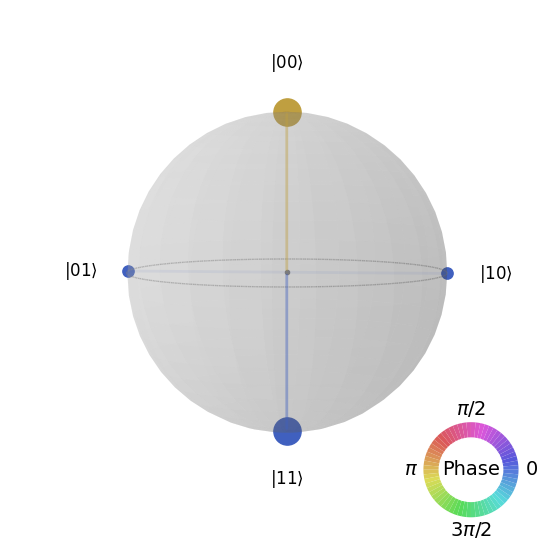


--- 3. Quantum Steering Ellipsoid: Steering Ellipsoid for Final State ---
This shows the states Qubit B can be 'steered' to by measuring Qubit A.
If it's a single point, there's no steering. If it's a non-trivial ellipsoid, the state is entangled.


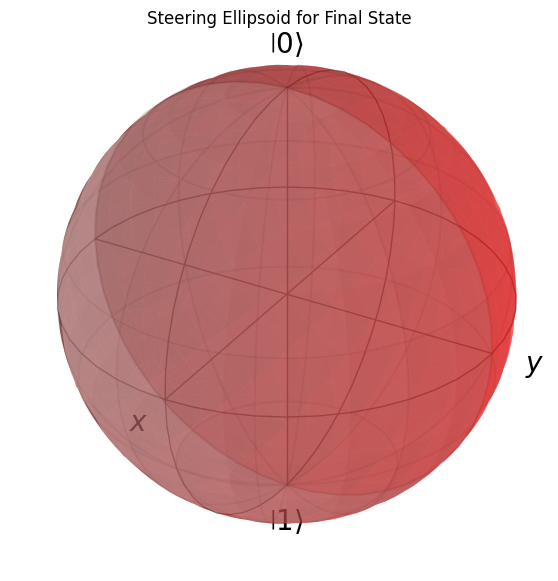


--- 4. Schmidt Decomposition: Schmidt Decomposition for Final State ---
Any pure 2-qubit state can be written as |psi> = l0*|u0>|v0> + l1*|u1>|v1>.
The Schmidt coefficients (l0, l1) quantify entanglement.
Schmidt Coefficients: lambda_0 = 0.7071, lambda_1 = 0.7071
Entanglement (Concurrence): 1.0000


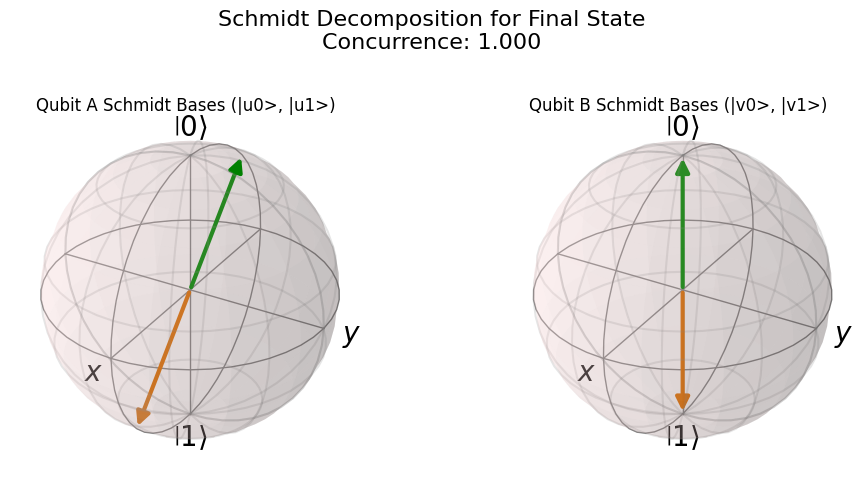


--- 5. Toroidal Geometry (Conceptual Explanation) ---
This is a highly abstract method mapping entanglement invariants to a torus surface.
It's powerful for classifying entanglement but too complex for standard library plotting.

--- 6. Correlation Invariants Plot: Final Entangled State ---
This plot shows the invariants of the state under local unitary operations.
These are the eigenvalues of T_transpose * T, where T is the correlation matrix.
The values reveal the nature and strength of correlations between the qubits.
Local Invariants: [1. 1. 1.]


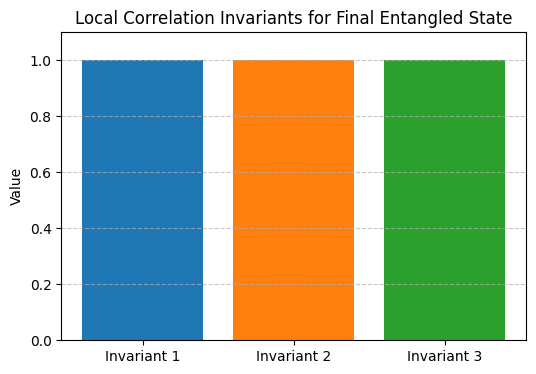


--- 7. Wigner Function: Wigner Functions for Final State ---
A phase-space representation. Negative values (red) are a key sign of non-classicality.


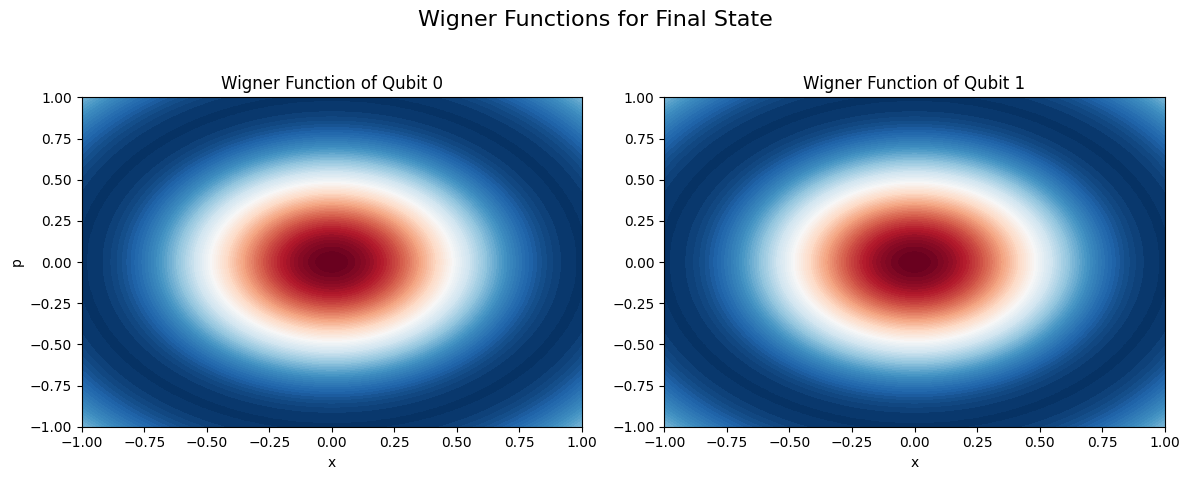


--- 8. Density Matrix: Density Matrix for Final State ---
Shows the real (blue) and imaginary (red) parts of the density matrix.
Off-diagonal elements indicate coherence and entanglement.


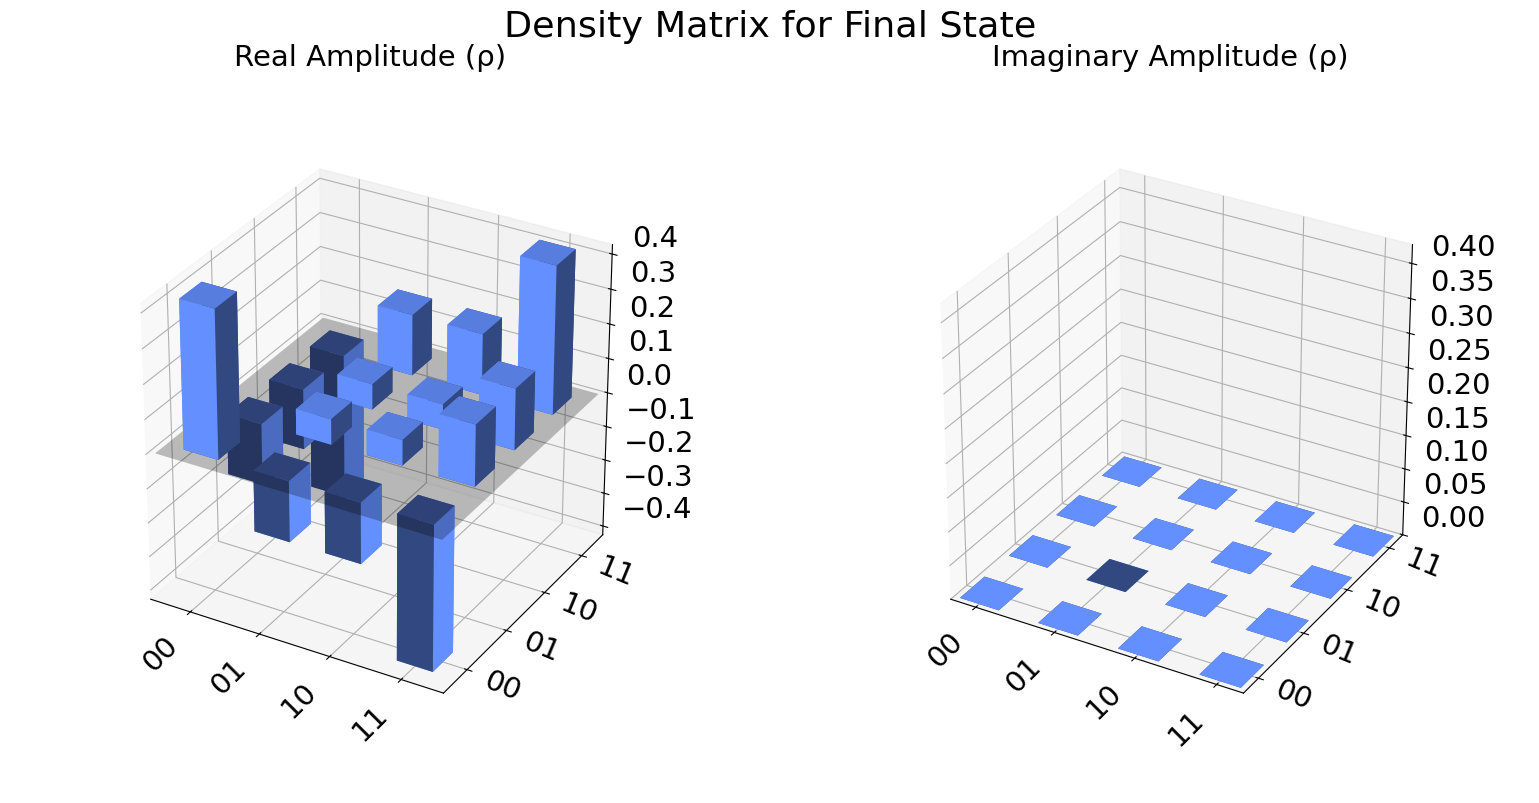


--- Analysis Complete ---


In [9]:
# Authored by Onri Jay Benally (2025)
#  Comprehensive 2-Qubit State Visualization (8 Methods)
#
#  This script demonstrates multiple methods for visualizing a 2-qubit state,
#  showcasing the differences between a simple product state (|00>) and a
#  complex entangled state using a total of 8 visualization techniques.

# --- Step 1: Install necessary libraries ---
# We need qiskit, qutip, scipy, and pylatexenc for circuit drawing.
!pip install qiskit qiskit-aer qutip scipy pylatexenc --quiet
print("Libraries installed successfully.")

# --- Step 2: Import libraries ---
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.linalg import svd

# Qiskit imports
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector, DensityMatrix
from qiskit.visualization import plot_state_city, plot_bloch_multivector, plot_state_qsphere

# QuTiP imports for Wigner function and Bloch sphere
from qutip import Qobj, wigner, Bloch

# --- Step 3: Define All Visualization Functions ---

# Helper Pauli matrices
sigmax = np.array([[0, 1], [1, 0]])
sigmay = np.array([[0, -1j], [1j, 0]])
sigmaz = np.array([[1, 0], [0, -1]])
pauli_matrices = [sigmax, sigmay, sigmaz]

def plot_bloch_multivector_viz(state, title):
    """Visualizes the state using two separate Bloch spheres."""
    print(f"\n--- 1. Bloch Sphere Multivector: {title} ---")
    print("This shows the state of each qubit on its own Bloch sphere.")
    print("For entangled states, the vectors are inside the sphere, indicating a mixed state for each qubit.")
    display(plot_bloch_multivector(state, title=title))

def plot_q_sphere_viz(state, title):
    """Visualizes the state using a Q-sphere."""
    print(f"\n--- 2. Q-sphere: {title} ---")
    print("The Q-sphere maps state amplitudes and phases to a sphere.")
    print("The size of a point represents the magnitude of the amplitude for a basis state,")
    print("and the color represents its phase.")
    display(plot_state_qsphere(state))

def plot_steering_ellipsoid(state, title):
    """Calculates and plots the quantum steering ellipsoid."""
    print(f"\n--- 3. Quantum Steering Ellipsoid: {title} ---")
    print("This shows the states Qubit B can be 'steered' to by measuring Qubit A.")
    print("If it's a single point, there's no steering. If it's a non-trivial ellipsoid, the state is entangled.")
    rho = state.data
    # Calculate Bloch vectors and correlation tensor
    a = np.array([np.trace(rho @ np.kron(s, np.eye(2))).real for s in pauli_matrices])
    b = np.array([np.trace(rho @ np.kron(np.eye(2), s)).real for s in pauli_matrices])
    T = np.array([[np.trace(rho @ np.kron(si, sj)).real for sj in pauli_matrices] for si in pauli_matrices])

    # Center of ellipsoid
    center = b

    # Plotting
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot(111, projection='3d')
    b_sphere = Bloch(axes=ax)
    b_sphere.render()

    # Generate points on a sphere
    u, v = np.linspace(0, 2 * np.pi, 100), np.linspace(0, np.pi, 100)
    x = np.outer(np.cos(u), np.sin(v))
    y = np.outer(np.sin(u), np.sin(v))
    z = np.outer(np.ones(np.size(u)), np.cos(v))

    try:
        U, s, Vh = np.linalg.svd(T)
        radii = s
        points = np.array([x.flatten(), y.flatten(), z.flatten()])
        scaled_points = np.diag(radii) @ points
        rotated_points = U @ scaled_points
        ex, ey, ez = rotated_points[0,:].reshape(x.shape) + center[0], rotated_points[1,:].reshape(y.shape) + center[1], rotated_points[2,:].reshape(z.shape) + center[2]
        ax.plot_surface(ex, ey, ez, rstride=4, cstride=4, color='r', alpha=0.4)
    except np.linalg.LinAlgError:
        print("Could not generate ellipsoid (likely a point for product state).")
        ax.scatter(center[0], center[1], center[2], color='r', s=100)

    ax.set_title(title)
    plt.show()

def visualize_schmidt_decomposition(state, title):
    """Calculates and visualizes the Schmidt decomposition."""
    print(f"\n--- 4. Schmidt Decomposition: {title} ---")
    print("Any pure 2-qubit state can be written as |psi> = l0*|u0>|v0> + l1*|u1>|v1>.")
    print("The Schmidt coefficients (l0, l1) quantify entanglement.")
    if not isinstance(state, Statevector):
        print("Schmidt decomposition is only defined for pure states (Statevectors).")
        return
    M = state.data.reshape((2, 2))
    U, s, Vh = svd(M)
    lambda_0, lambda_1 = s
    concurrence = 2 * lambda_0 * lambda_1
    print(f"Schmidt Coefficients: lambda_0 = {lambda_0:.4f}, lambda_1 = {lambda_1:.4f}")
    print(f"Entanglement (Concurrence): {concurrence:.4f}")
    u0, u1 = U[:, 0], U[:, 1]
    v0, v1 = Vh.T[:, 0], Vh.T[:, 1]
    fig = plt.figure(figsize=(10, 5))
    fig.suptitle(f"{title}\nConcurrence: {concurrence:.3f}", fontsize=16)
    ax1 = fig.add_subplot(121, projection='3d')
    b1 = Bloch(axes=ax1)
    b1.add_states([Qobj(u0), Qobj(u1)])
    b1.render()
    ax1.set_title("Qubit A Schmidt Bases (|u0>, |u1>)")
    ax2 = fig.add_subplot(122, projection='3d')
    b2 = Bloch(axes=ax2)
    b2.add_states([Qobj(v0), Qobj(v1)])
    b2.render()
    ax2.set_title("Qubit B Schmidt Bases (|v0>, |v1>)")
    plt.tight_layout(rect=[0, 0.03, 1, 0.92])
    plt.show()

def explain_toroidal_geometry():
    """Provides a conceptual explanation of the toroidal representation."""
    print("\n--- 5. Toroidal Geometry (Conceptual Explanation) ---")
    print("This is a highly abstract method mapping entanglement invariants to a torus surface.")
    print("It's powerful for classifying entanglement but too complex for standard library plotting.")

def plot_correlation_invariants(state, title):
    """Calculates and plots the local invariants of the state."""
    print(f"\n--- 6. Correlation Invariants Plot: {title} ---")
    print("This plot shows the invariants of the state under local unitary operations.")
    print("These are the eigenvalues of T_transpose * T, where T is the correlation matrix.")
    print("The values reveal the nature and strength of correlations between the qubits.")

    rho = state.data
    # Calculate correlation tensor T
    T = np.array([[np.trace(rho @ np.kron(si, sj)).real for sj in pauli_matrices] for si in pauli_matrices])

    # Calculate T_transpose * T
    T_transpose_T = T.T @ T

    # Eigenvalues are the local invariants
    invariants = np.linalg.eigvals(T_transpose_T)
    invariants = np.sort(np.real(invariants))[::-1] # Sort descending

    print(f"Local Invariants: {invariants}")

    # Create a bar plot for the invariants
    plt.figure(figsize=(6, 4))
    labels = ['Invariant 1', 'Invariant 2', 'Invariant 3']
    plt.bar(labels, invariants, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
    plt.ylabel("Value")
    plt.title(f"Local Correlation Invariants for {title}")
    plt.ylim(0, 1.1) # Max value of an invariant is 1 for Bell states
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

def plot_wigner_function(state, title):
    """Visualizes the discrete Wigner function for each qubit."""
    print(f"\n--- 7. Wigner Function: {title} ---")
    print("A phase-space representation. Negative values (red) are a key sign of non-classicality.")
    qutip_state = Qobj(state.data, dims=[[2, 2], [2, 2]])
    qutip_state_q0 = qutip_state.ptrace(0)
    qutip_state_q1 = qutip_state.ptrace(1)
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    x = np.linspace(-1, 1, 100)
    W0 = wigner(qutip_state_q0, x, x)
    axes[0].contourf(x, x, W0, 100, cmap='RdBu')
    axes[0].set_title("Wigner Function of Qubit 0")
    axes[0].set_xlabel("x"); axes[0].set_ylabel("p")
    W1 = wigner(qutip_state_q1, x, x)
    axes[1].contourf(x, x, W1, 100, cmap='RdBu')
    axes[1].set_title("Wigner Function of Qubit 1")
    axes[1].set_xlabel("x")
    fig.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

def plot_density_matrix(state, title):
    """Visualizes the density matrix using a city plot."""
    print(f"\n--- 8. Density Matrix: {title} ---")
    print("Shows the real (blue) and imaginary (red) parts of the density matrix.")
    print("Off-diagonal elements indicate coherence and entanglement.")
    display(plot_state_city(state, title=title))

# --- Step 4: Analyze the Initial State |00> ---

print("="*50)
print("=== Analyzing Initial State: |00> (Product State) ===")
print("="*50)

initial_circuit = QuantumCircuit(2)
initial_statevector = Statevector(initial_circuit)
initial_density_matrix = DensityMatrix(initial_circuit)

# Generate all 8 plots for the initial state
plot_bloch_multivector_viz(initial_density_matrix, "Initial State: |00>")
plot_q_sphere_viz(initial_density_matrix, "Initial State: |00>")
plot_steering_ellipsoid(initial_density_matrix, "Steering Ellipsoid for |00>")
visualize_schmidt_decomposition(initial_statevector, "Schmidt Decomposition for |00>")
explain_toroidal_geometry()
plot_correlation_invariants(initial_density_matrix, "Initial State: |00>")
plot_wigner_function(initial_density_matrix, "Wigner Functions for |00>")
plot_density_matrix(initial_density_matrix, "Density Matrix for |00>")

# --- Step 5: Build and Analyze the Final State ---

print("\n\n" + "="*50)
print("===   Analyzing Final State (Entangled State)    ===")
print("="*50)

# Create a circuit with 2 qubits
qc = QuantumCircuit(2)
qc.h(0)      # Hadamard on q0
qc.cx(0, 1)  # CNOT with q0 as control, q1 as target
qc.ry(np.pi / 4, 1) # Y-rotation of pi/4 on q1
qc.z(1)      # Phase Flip (Z gate) on q1

print("\nCircuit Diagram:")
# CORRECTED LINE: Changed 'mpl' to 'text' to avoid kernel/dependency issues.
# To get the graphical plot, you can change 'text' back to 'mpl'
# and restart the runtime after the installation cell finishes.
display(qc.draw('text'))

simulator = AerSimulator()
final_statevector = Statevector(qc)
final_density_matrix = DensityMatrix(qc)

# Generate all 8 plots for the final state
plot_bloch_multivector_viz(final_density_matrix, "Final Entangled State")
plot_q_sphere_viz(final_density_matrix, "Final Entangled State")
plot_steering_ellipsoid(final_density_matrix, "Steering Ellipsoid for Final State")
visualize_schmidt_decomposition(final_statevector, "Schmidt Decomposition for Final State")
explain_toroidal_geometry()
plot_correlation_invariants(final_density_matrix, "Final Entangled State")
plot_wigner_function(final_density_matrix, "Wigner Functions for Final State")
plot_density_matrix(final_density_matrix, "Density Matrix for Final State")

print("\n--- Analysis Complete ---")